## Project Week8 Markov chain - FINAL SUMMARY

* We have anonymously tracked the movement of all DOODL customers during a five-day week. 
* In the following files you find tabular data indicating where customers spent their time. 

Our sales department is interested in a summary of the collected data. Please generate a report including numbers and diagrams. Note that your audience are not data scientists, so take care to prepare insights that are as clear as possible. We are interested in the following:
1. Calculate the total number of customers in each section
2. Calculate the total number of customers in each section over time
3. Display the number of customers at checkout over time
4. Calculate the time each customer spent in the market
5. Calculate the total number of customers present in the supermarket over time.
6. Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [2]:
def datetime_index(df):
    df['datetime'] = pd.to_datetime(df['timestamp']) # convert column to datetime object
    df.set_index('datetime', inplace=True) # set column 'datetime' to index
    #del df['timestamp']


In [3]:
mon = pd.read_csv('data/monday.csv', sep=';', parse_dates=True)
tue = pd.read_csv('data/tuesday.csv', sep=';', parse_dates=True)
wed = pd.read_csv('data/wednesday.csv', sep=';', parse_dates=True)
thu = pd.read_csv('data/thursday.csv', sep=';', parse_dates=True)
fri = pd.read_csv('data/friday.csv', sep=';', parse_dates=True)

In [4]:
mon.groupby('customer_no').count()

,timestamp,location
customer_no,,
1,2,2
2,2,2
3,2,2
4,2,2
5,2,2
...,...,...
1443,2,2
1444,2,2
1445,1,1


In [5]:
# One complete dataframe:

df = pd.concat([mon, tue, wed, thu, fri])
df['datetime'] = pd.to_datetime(df['timestamp'])
df.head(2)

,timestamp,customer_no,location,datetime
0,2019-09-02 07:03:00,1,dairy,2019-09-02 07:03:00
1,2019-09-02 07:03:00,2,dairy,2019-09-02 07:03:00


In [6]:
df['time'] = df['datetime'].dt.time
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.weekday
df['month'] = df['datetime'].dt.month
df['date'] = df['datetime'].dt.date
df.set_index('datetime', inplace=True)

In [7]:
df.head(3)

,timestamp,customer_no,location,time,hour,day,month,date
datetime,,,,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,07:03:00,7,0,9,2019-09-02
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,07:03:00,7,0,9,2019-09-02
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,07:04:00,7,0,9,2019-09-02


## 1. Calculate the total number of customers in each section

**Max: this confused me at first, but it means the number of customers visiting each location during the week, right?**

In [8]:
total_cust = pd.DataFrame(df.groupby('location').count()['customer_no'])

In [9]:
total_cust

,customer_no
location,
checkout,7417
dairy,4679
drinks,3905
fruit,5122
spices,3754


[Text(0, 0.5, '# of customers'), Text(0.5, 0, 'supermarket section')]

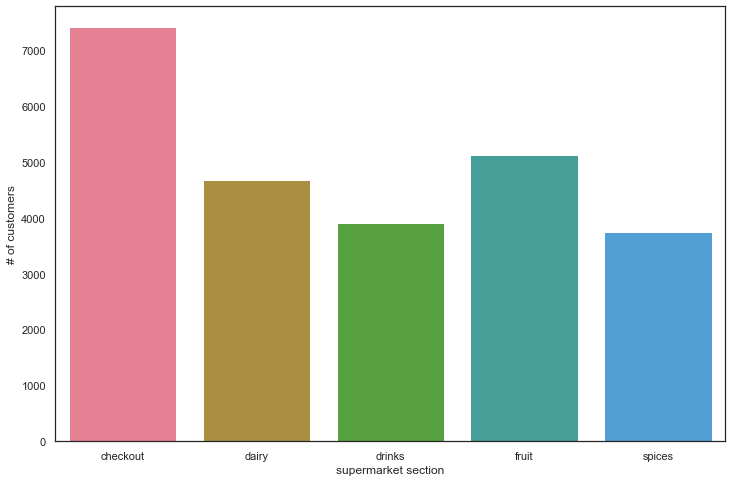

In [10]:
plt.figure(figsize=(12,8))
sns.set(style='white')
sns.set_palette('husl')
ax = sns.barplot(x=total_cust.index, y=total_cust['customer_no'], data=total_cust)
ax.set(xlabel='supermarket section', ylabel='# of customers')

## 2. Calculate the total number of customers in each section over time

In [11]:
customers_over_time = pd.DataFrame(df.groupby(['location','hour'])['customer_no'].count())
customers_over_time.fillna(0, inplace=True)
customers_over_time = pd.DataFrame(customers_over_time)
customers_over_time.reset_index(level=0, inplace=True)
customers_over_time.head(5)

,location,customer_no
hour,,
7,checkout,454
8,checkout,677
9,checkout,455
10,checkout,427
11,checkout,342


In [12]:
customers_over_time.reset_index(inplace=True)
customers_over_time

,hour,location,customer_no
0,7,checkout,454
1,8,checkout,677
2,9,checkout,455
3,10,checkout,427
4,11,checkout,342
...,...,...,...
70,17,spices,269
71,18,spices,346
72,19,spices,389
73,20,spices,246


[Text(0, 0.5, '# of customers'), Text(0.5, 0, 'time of the day [h]')]

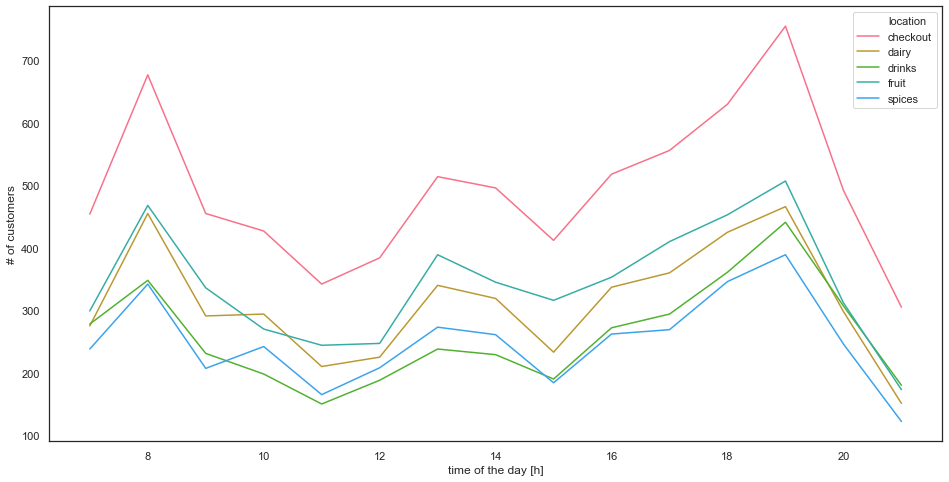

In [13]:
plt.figure(figsize=(16,8))
sns.set(style='white')
sns.set_palette('husl')
ax = sns.lineplot(x='hour', y='customer_no', hue='location', data=customers_over_time)
ax.set(xlabel='time of the day [h]', ylabel='# of customers')

## 3. Display the number of customers at checkout over time

In [14]:
checkouts_overtime = customers_over_time.loc[customers_over_time['location']=='checkout']

[Text(0, 0.5, '# of customers at checkout'),
 Text(0.5, 0, 'time of the day [h]')]

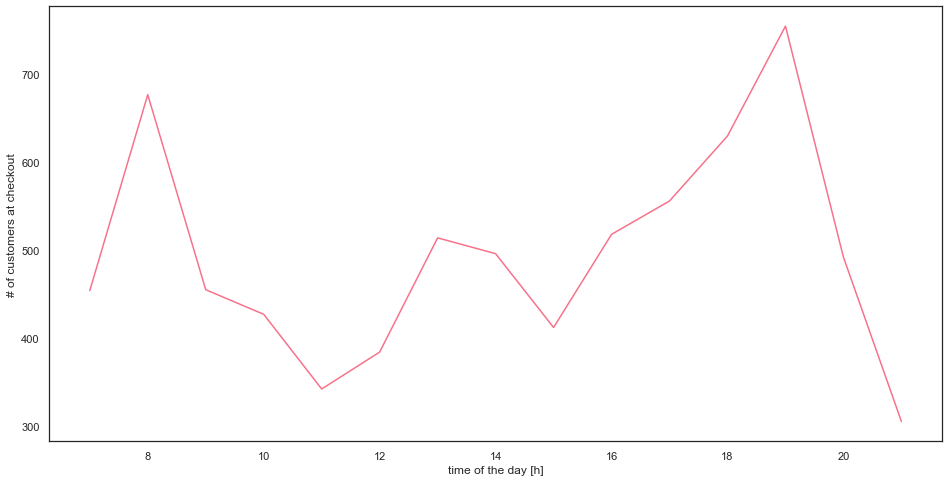

In [15]:
plt.figure(figsize=(16,8))
sns.set(style='white')
sns.set_palette('husl')
ax = sns.lineplot(x='hour', y='customer_no', data=checkouts_overtime)
ax.set(xlabel='time of the day [h]', ylabel='# of customers at checkout')

## 4. Calculate the time each customer spent in the market

In [16]:
mon['timestamp'] = pd.to_datetime(mon['timestamp'])
time_diff = pd.DataFrame(mon.groupby('customer_no').min()['timestamp'])
time_diff['exit'] = mon.groupby('customer_no').max()['timestamp']

In [17]:
time_diff['time_spent'] = time_diff['exit'] - time_diff['timestamp']
time_diff = time_diff.drop(columns=['timestamp', 'exit'])
time_diff.head()

,time_spent
customer_no,
1,00:02:00
2,00:03:00
3,00:02:00
4,00:04:00
5,00:01:00


    I don't know if creating a column like this is also a good way of getting the time spent in the market
    by each unique customer?
    
    ps: nvm, its the same thing that has been done haha. You can delete this part later if irrelevant

In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [19]:
arrival = pd.DataFrame(df.groupby(['day', 'customer_no'])['timestamp'].min())
departure = pd.DataFrame(df.groupby(['day', 'customer_no'])['timestamp'].max())

In [20]:
shopping_time = pd.DataFrame(departure['timestamp'] - arrival['timestamp'])
shopping_time.reset_index(inplace=True)
shopping_time.tail(3)

,day,customer_no,timestamp
7442,4,1508,00:02:00
7443,4,1509,00:00:00
7444,4,1510,00:00:00


In [21]:
shopping_time = shopping_time[shopping_time.timestamp != '00:00:00']
shopping_time.tail(3)

,day,customer_no,timestamp
7439,4,1505,00:01:00
7441,4,1507,00:02:00
7442,4,1508,00:02:00


In [22]:
average_shopping_time = shopping_time['timestamp'].mean()
average_shopping_time

Timedelta('0 days 00:06:14.862829')

Text(0, 0.5, '# of customers')

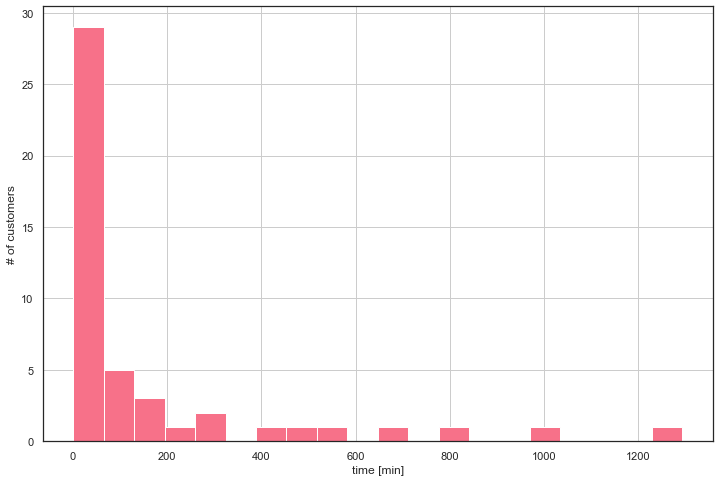

In [23]:
plt.figure(figsize=(12,8))
shopping_time['timestamp'].value_counts().hist(bins = 20)
plt.xlabel('time [min]')
plt.ylabel('# of customers')

In [24]:
cust_present = pd.DataFrame(shopping_time.reset_index().groupby('timestamp')['customer_no'].count())
cust_present.reset_index(inplace = True)
cust_present.head(3)

,timestamp,customer_no
0,00:01:00,1293
1,00:02:00,1004
2,00:03:00,822


[(-1, 1500)]

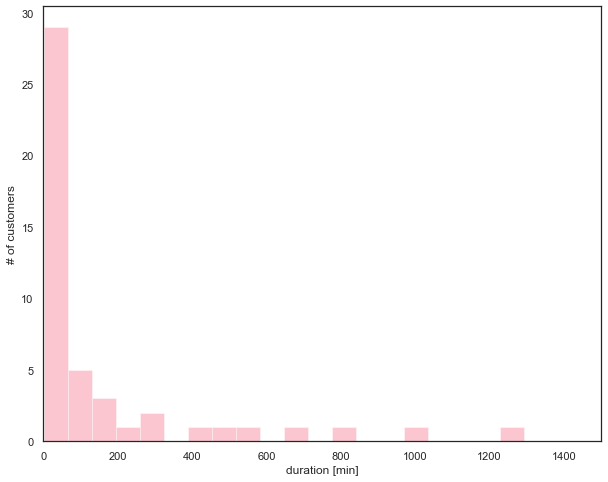

In [25]:
# Histogram using seaborn:
plt.figure(figsize=(10,8))
sns.set(color_codes=True)
sns.set(style='white', palette='husl')
ax = sns.distplot(cust_present['customer_no'], hist=True, bins=20, kde=False)
ax.set(xlabel='duration [min]', ylabel='# of customers')
ax.set(xlim=(-1, 1500))

[(-1, 1500)]

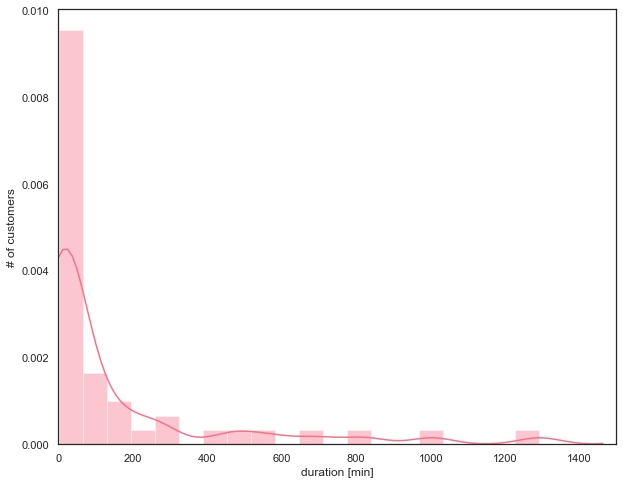

In [26]:
# This is not a histogram but a density (arae under the curve = 1):
plt.figure(figsize=(10,8))
sns.set(color_codes=True)
sns.set(style='white', palette='husl')
ax = sns.distplot(cust_present['customer_no'], hist=True, bins=20, kde=True)
ax.set(xlabel='duration [min]', ylabel='# of customers')
ax.set(xlim=(-1, 1500))

## 5. Calculate the total number of customers present in the supermarket over time.

In [27]:
total_customers_over_time = pd.DataFrame(df.groupby('timestamp').count()['customer_no'])
total_customers_over_time.reset_index(level=0, inplace=True)
total_customers_over_time['timestamp'] = pd.to_datetime(total_customers_over_time['timestamp'])
total_customers_over_time['hour'] = total_customers_over_time['timestamp'].dt.hour
total_customers_over_time['day'] = total_customers_over_time['timestamp'].dt.day
total_customers_per_hour = pd.DataFrame(total_customers_over_time.groupby(['day', 'hour'])['customer_no'].sum())
total_customers_per_hour.reset_index(inplace=True)
total_customers_per_hour.head()

,day,hour,customer_no
0,2,7,317
1,2,8,364
2,2,9,308
3,2,10,282
4,2,11,189


[Text(0, 0.5, '# of customers'), Text(0.5, 0, 'time of the day')]

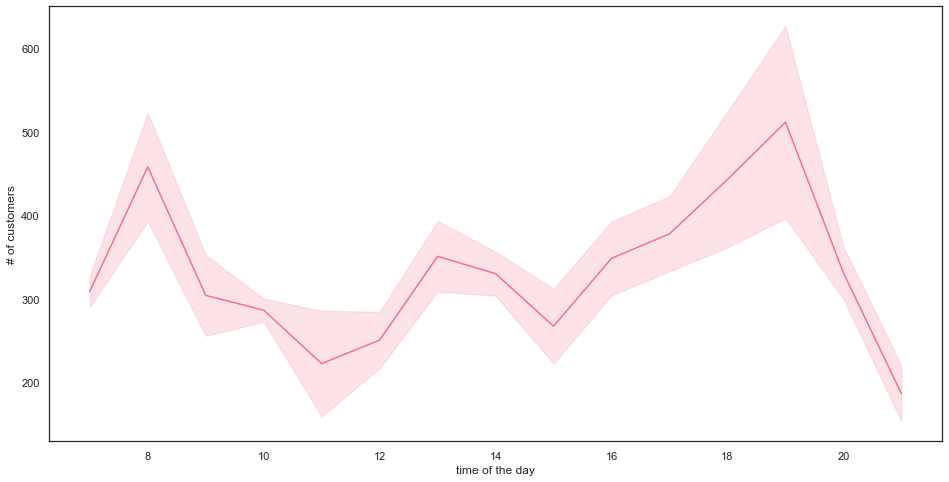

In [28]:
plt.figure(figsize=(16,8))
sns.set(style='white')
sns.set_palette('husl')
ax = sns.lineplot(x='hour', y='customer_no', data=total_customers_per_hour, ci = 'sd')
ax.set(xlabel='time of the day', ylabel='# of customers')

In [29]:
total_customers_per_hour['customer_no'].sum()

24877

In [30]:
mon_total_customers = mon['customer_no'].count()
tue_total_customers = tue['customer_no'].count()
wed_total_customers = wed['customer_no'].count()
thu_total_customers = thu['customer_no'].count()
fri_total_customers = fri['customer_no'].count()
mon_total_customers + tue_total_customers + wed_total_customers + thu_total_customers + fri_total_customers

24877

## 6. Analyze if the first section that customers visit follows a different pattern than the following ones

* Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”)

In [31]:
df.head(3)

,timestamp,customer_no,location,time,hour,day,month,date
datetime,,,,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,07:03:00,7,0,9,2019-09-02
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,07:03:00,7,0,9,2019-09-02
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,07:04:00,7,0,9,2019-09-02


In [32]:
#these are the times when the customers enter the supermarket:
#df.groupby(['day', 'customer_no'])['time'].min()
#df['first'] = 0

In [33]:
df['before'] = df.groupby(['day', 'customer_no'])['location'].shift(1)
df.head(10)

,timestamp,customer_no,location,time,hour,day,month,date,before
datetime,,,,,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,07:03:00,7,0,9,2019-09-02,NaN
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,07:03:00,7,0,9,2019-09-02,NaN
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,07:04:00,7,0,9,2019-09-02,NaN
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,07:04:00,7,0,9,2019-09-02,NaN
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,07:04:00,7,0,9,2019-09-02,NaN
2019-09-02 07:04:00,2019-09-02 07:04:00,6,spices,07:04:00,7,0,9,2019-09-02,NaN
2019-09-02 07:04:00,2019-09-02 07:04:00,7,spices,07:04:00,7,0,9,2019-09-02,NaN
2019-09-02 07:04:00,2019-09-02 07:04:00,8,fruit,07:04:00,7,0,9,2019-09-02,NaN
2019-09-02 07:05:00,2019-09-02 07:05:00,1,checkout,07:05:00,7,0,9,2019-09-02,dairy


## 7. Estimate the revenue: which is the most profitable section?

In [34]:
#revenue/minute in euros:

revenue = {'fruit':4, 'spices':3, 'dairy':5, 'drinks':6}

In [35]:
arrival2 = pd.DataFrame(df.groupby(['day', 'location', 'customer_no'])['timestamp'].min())
departure2 = pd.DataFrame(df.groupby(['day', 'location', 'customer_no'])['timestamp'].max())

In [36]:
shopping_time2 = pd.DataFrame(departure2['timestamp'] - arrival2['timestamp'])
shopping_time2.reset_index(inplace=True)
shopping_time2 = shopping_time2[shopping_time2.timestamp != '00:00:00']
shopping_time2.tail(10)

,day,location,customer_no,timestamp
21618,4,spices,1372,00:17:00
21633,4,spices,1399,00:11:00
21635,4,spices,1404,00:10:00
21640,4,spices,1420,00:11:00
21643,4,spices,1429,00:05:00
21646,4,spices,1435,00:14:00
21657,4,spices,1456,00:06:00
21660,4,spices,1464,00:06:00
21663,4,spices,1472,00:03:00
21664,4,spices,1477,00:04:00


In [37]:
shopping_time2.sort_values(by=['location'])
shopping_time2

,day,location,customer_no,timestamp
1441,0,dairy,6,00:21:00
1443,0,dairy,13,00:08:00
1451,0,dairy,33,00:03:00
1458,0,dairy,42,00:07:00
1459,0,dairy,43,00:13:00
...,...,...,...,...
21646,4,spices,1435,00:14:00
21657,4,spices,1456,00:06:00
21660,4,spices,1464,00:06:00
21663,4,spices,1472,00:03:00


In [38]:
shopping_time2['location'].unique()

array(['dairy', 'drinks', 'fruit', 'spices'], dtype=object)

In [39]:
shopping_time3 = pd.DataFrame(shopping_time2.groupby(['day','location'])['timestamp'].sum())
shopping_time3

timestamp
day location          
0   dairy     22:54:00
    drinks    14:28:00
    fruit     21:16:00
    spices    17:51:00
1   dairy     18:18:00
    drinks    12:08:00
    fruit     17:27:00
    spices    15:17:00
2   dairy     20:24:00
    drinks    11:43:00
    fruit     19:16:00
    spices    17:39:00
3   dairy     23:37:00
    drinks    16:03:00
    fruit     21:23:00
    spices    21:11:00
4   dairy     21:49:00
    drinks    14:26:00
    fruit     23:02:00
    spices    15:45:00

In [40]:
#shopping_time3 = shopping_time3.stack('day')
shopping_time3 = shopping_time3.unstack('day')
shopping_time3.head()

timestamp                                    
day              0        1        2        3        4
location                                              
dairy     22:54:00 18:18:00 20:24:00 23:37:00 21:49:00
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00

In [41]:
shopping_time3['mean'] = shopping_time3.mean(axis=1)
shopping_time3.head()

timestamp                                         mean
day              0        1        2        3        4         
location                                                       
dairy     22:54:00 18:18:00 20:24:00 23:37:00 21:49:00 21:24:24
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00 13:45:36
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00 20:28:48
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00 17:32:36

In [42]:
shopping_time3['mean'] = shopping_time3['mean'].dt.seconds.div(60).astype(int)
shopping_time3

timestamp                                      mean
day              0        1        2        3        4      
location                                                    
dairy     22:54:00 18:18:00 20:24:00 23:37:00 21:49:00  1284
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00   825
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00  1228
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00  1052

In [43]:
shopping_time3['revenue'] = shopping_time3.index.map(revenue)
shopping_time3.head()

timestamp                                      mean revenue
day              0        1        2        3        4              
location                                                            
dairy     22:54:00 18:18:00 20:24:00 23:37:00 21:49:00  1284       5
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00   825       6
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00  1228       4
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00  1052       3

In [44]:
shopping_time3['total_revenue'] = shopping_time3['mean'] * shopping_time3['revenue']
shopping_time3

timestamp                                      mean revenue  \
day              0        1        2        3        4                 
location                                                               
dairy     22:54:00 18:18:00 20:24:00 23:37:00 21:49:00  1284       5   
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00   825       6   
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00  1228       4   
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00  1052       3   

         total_revenue  
day                     
location                
dairy             6420  
drinks            4950  
fruit             4912  
spices            3156

In [45]:
shopping_time3.tail(3)

timestamp                                      mean revenue  \
day              0        1        2        3        4                 
location                                                               
drinks    14:28:00 12:08:00 11:43:00 16:03:00 14:26:00   825       6   
fruit     21:16:00 17:27:00 19:16:00 21:23:00 23:02:00  1228       4   
spices    17:51:00 15:17:00 17:39:00 21:11:00 15:45:00  1052       3   

         total_revenue  
day                     
location                
drinks            4950  
fruit             4912  
spices            3156

[Text(0, 0.5, 'revenue per week [€]'), Text(0.5, 0, 'supermarket section')]

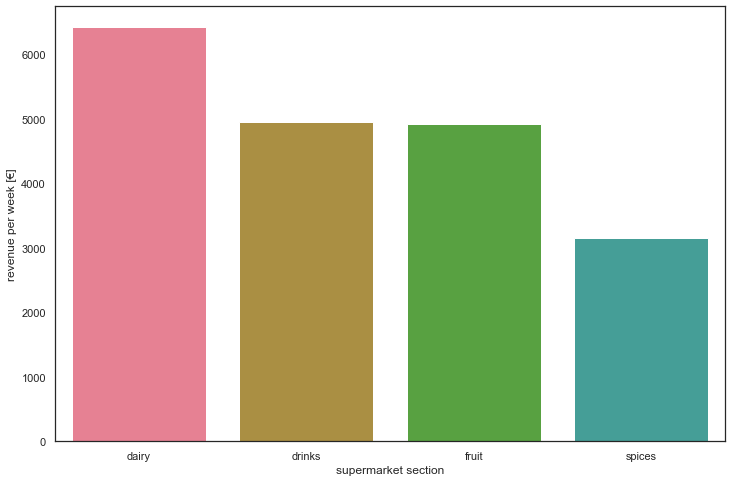

In [46]:
plt.figure(figsize=(12,8))
sns.set(style='white')
sns.set_palette('husl')
ax = sns.barplot(x=shopping_time3.index, y=shopping_time3['total_revenue'], data=shopping_time3)
ax.set(xlabel='supermarket section', ylabel='revenue per week [€]')